# Linear Regression | Model Accuracy Building | AI-Engineear

* MAE(Mean Absolute Error)
* MSE(Mean squared Error)
* RMSE(Root Mean Squared Error)
* R2 SCORE
* Adjusted R2 SCORE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dataset
df= pd.read_csv('/kaggle/input/simple-lr-data/placement (3).csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


Text(0, 0.5, 'package (in lpa)')

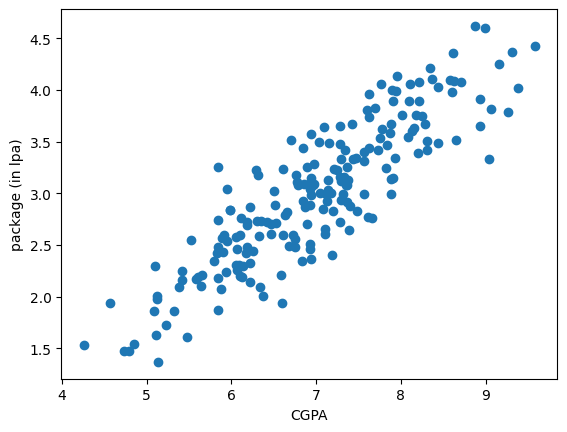

In [5]:
plt.scatter(df['cgpa'], df['package'])
plt.xlabel('CGPA')
plt.ylabel('package (in lpa)')

In [6]:
X= df.iloc[:, 0:1]
y= df.iloc[:,-1]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

Text(0, 0.5, 'Package (in lpa)')

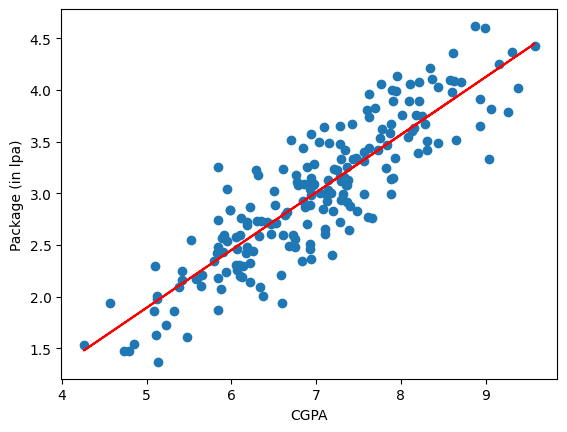

In [9]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(X_train, lr.predict(X_train), color= 'red')
plt.xlabel('CGPA')
plt.ylabel('Package (in lpa)')

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
y_pred= lr.predict(X_test)

In [12]:
y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

# MAE(Mean Absolute Error)

In [13]:
print('MAE(Mean Absolute Error):',mean_absolute_error(y_test, y_pred))

MAE(Mean Absolute Error): 0.2884710931878175


# MSE(Mean squared Error)

In [14]:
print('MSE(Mean squared Error):', mean_squared_error(y_test, y_pred))

MSE(Mean squared Error): 0.12129235313495527


# RMSE(Root Mean Squared Error)

In [15]:
print('RSME(Root Mean Squared Error):',np.sqrt(mean_squared_error(y_test,y_pred)))

RSME(Root Mean Squared Error): 0.34827051717731616


# R2_SCORE

In [16]:
print('R2_SCORE:',r2_score(y_test,y_pred))

R2_SCORE: 0.780730147510384


In [17]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.249352,3.26
1,5.12,0.468223,1.98
2,7.82,0.558723,3.25
3,7.42,0.788206,3.67
4,6.94,0.309780,3.57


Text(0, 0.5, 'Package(in lpa)')

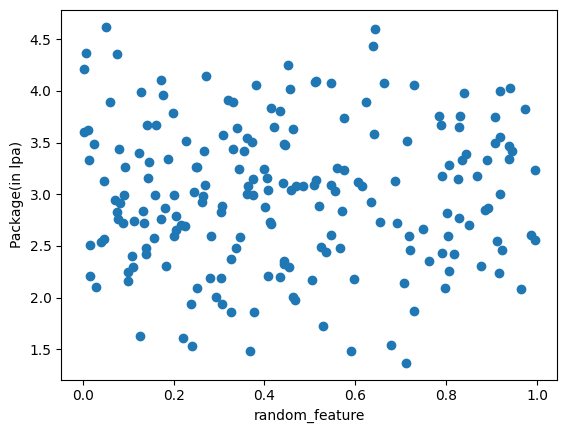

In [18]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [19]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [23]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7720667051293126


# Adjusted R2 SCORE

In [24]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7597459864876539

In [25]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [26]:
new_df2.sample(5)

,cgpa,iq,package
125,7.33,2.56,3.16
72,7.78,4.32,3.62
136,5.64,1.30,2.10
94,5.83,1.52,2.42
113,6.94,3.17,2.37


Text(0, 0.5, 'Package(in lpa)')

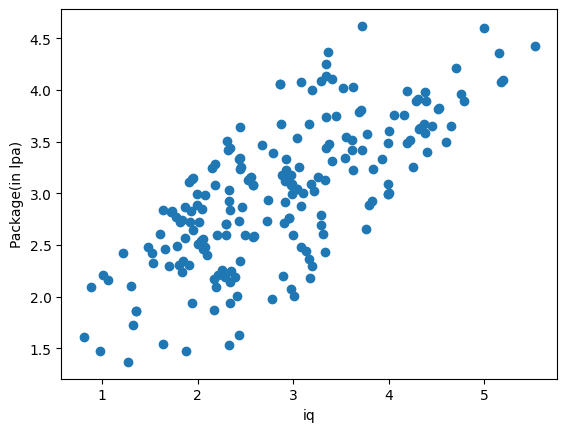

In [27]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [28]:
np.random.randint(-100,100)

-84

In [29]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [30]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [32]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8279780608609224


In [33]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.8186795776642155